## **Creación de modelos**

### 0. Importando librerías

In [27]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

### 1. Cargando los datos

- Algunas partes del código son tomadas de este notebook: [Heart Disease Prediction](https://www.kaggle.com/code/andls555/heart-disease-prediction)
- Son los datos limpiados en el notebook 03 y guardados en el repositorio en GitHub:

In [11]:
url = "https://raw.githubusercontent.com/ArleyF/proyecto_enfermedades_cardiacas/master/dataset/heart_2020_cleaned.csv"
df = pd.read_csv(url)

In [3]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,7.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,1,0,0
5,1,28.87,1,0,0,6.0,0.0,1,0,11,2,0,0,1,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,10,5,0,1,1,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,12,5,1,0,2,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,12,5,0,0,1,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,9,5,0,1,2,10.0,0,0,0


### 2. Entrenamiento

In [12]:
# Se separa la columna con la información de los sobrevivientes
y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)

In [13]:
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 3. Modelos

- Estandarización:

In [16]:
scaler = StandardScaler()

# Scale trainint data
X_train = scaler.fit_transform(X_train)

# Scale test data
X_test = scaler.fit_transform(X_test)

- Función para evaluar los modelos:

In [18]:
def evaluate_model(model, x_test, y_test):
    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

#### 3.1. Regresión logística

In [25]:
logreg = LogisticRegression(random_state=0, max_iter=1000)
logreg.fit(X_train, y_train)

# Evaluar modelo
logreg_eval = evaluate_model(logreg, X_test, y_test)

# Resultados
print('Accuracy:', logreg_eval['acc'])
print('Precision:', logreg_eval['prec'])
print('Recall:', logreg_eval['rec'])
print('F1 Score:', logreg_eval['f1'])
print('Cohens Kappa Score:', logreg_eval['kappa'])
print('Area Under Curve:', logreg_eval['auc'])
print('Confusion Matrix:\n', logreg_eval['cm'])

Accuracy: 0.9128660548163667
Precision: 0.510314875135722
Recall: 0.0840486409155937
F1 Score: 0.14432673115307845
Cohens Kappa Score: 0.12263191992434552
Area Under Curve: 0.8256810223421513
Confusion Matrix:
 [[57916   451]
 [ 5122   470]]


#### 3.2. Vecinos más cercanos

In [22]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

# Evaluar modelo
knn_eval = evaluate_model(knn, X_test, y_test)

# Resultados
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.9042355258837693
Precision: 0.3647894469812278
Recall: 0.12857653791130186
F1 Score: 0.19013618934285334
Cohens Kappa Score: 0.15146777554627422
Area Under Curve: 0.7028560668468152
Confusion Matrix:
 [[57115  1252]
 [ 4873   719]]


#### 3.3. Árbol de decisión

In [28]:
decision_tree = DecisionTreeClassifier(random_state=False)
decision_tree.fit(X_train, y_train)

# Evaluar modelo
decision_tree_eval = evaluate_model(decision_tree, X_test, y_test)

# Resultados
print('Accuracy:', decision_tree_eval['acc'])
print('Precision:', decision_tree_eval['prec'])
print('Recall:', decision_tree_eval['rec'])
print('F1 Score:', decision_tree_eval['f1'])
print('Cohens Kappa Score:', decision_tree_eval['kappa'])
print('Area Under Curve:', decision_tree_eval['auc'])
print('Confusion Matrix:\n', decision_tree_eval['cm'])

Accuracy: 0.8615988367547961
Precision: 0.23004306061609806
Recall: 0.24839055793991416
F1 Score: 0.23886500429922616
Cohens Kappa Score: 0.1628667763933821
Area Under Curve: 0.5863304263905763
Confusion Matrix:
 [[53718  4649]
 [ 4203  1389]]


### 4. Comparación

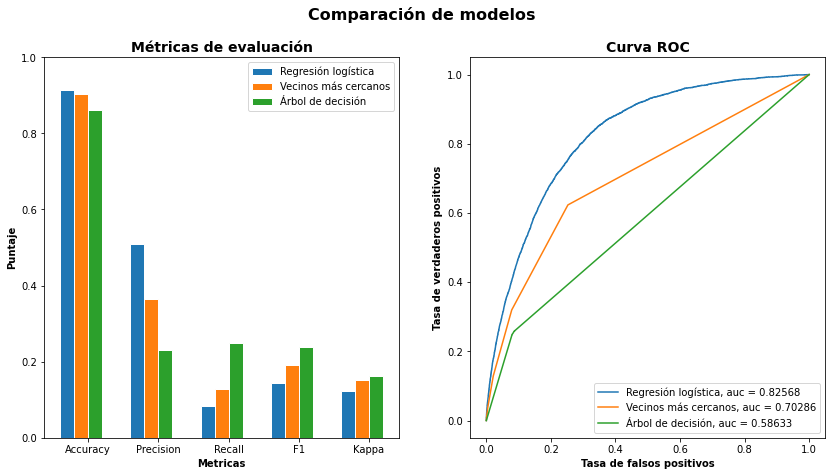

In [53]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparación de modelos', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
logreg_score = [logreg_eval['acc'], logreg_eval['prec'], logreg_eval['rec'], logreg_eval['f1'], logreg_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
decision_tree_score = [decision_tree_eval['acc'], decision_tree_eval['prec'], decision_tree_eval['rec'], decision_tree_eval['f1'], decision_tree_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(logreg_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

## Make the plot
ax1.bar(r1, logreg_score, width=barWidth, edgecolor='white', label='Regresión logística')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='Vecinos más cercanos')
ax1.bar(r3, decision_tree_score, width=barWidth, edgecolor='white', label='Árbol de decisión')

## Configure x and y axis
ax1.set_xlabel('Metricas', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(logreg_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Puntaje', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Métricas de evaluación', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(logreg_eval['fpr'], logreg_eval['tpr'], label='Regresión logística, auc = {:0.5f}'.format(logreg_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='Vecinos más cercanos, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(decision_tree_eval['fpr'], decision_tree_eval['tpr'], label='Árbol de decisión, auc = {:0.5f}'.format(decision_tree_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('Tasa de falsos positivos', fontweight='bold')
ax2.set_ylabel('Tasa de verdaderos positivos', fontweight='bold')

## Create legend & title
ax2.set_title('Curva ROC', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()